In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# in command line, did this to change the chr to actual numbers
awk '{gsub(/^chrXVI/,"16"); print}' BYxRM_segs_saccer3.bam.simplified.vcf > no_16.vcf
awk '{gsub(/^chrXV/,"15"); print}' no_16.vcf > no_15.vcf
awk '{gsub(/^chrXIV/,"14"); print}' no_15.vcf > no_14.vcf
awk '{gsub(/^chrXIII/,"13"); print}' no_14.vcf | awk '{gsub(/^chrXII/,"12"); print}' | awk '{gsub(/^chrXI/,"11"); print}' > no_11.vcf
awk '{gsub(/^chrX/,"10"); print}' no_11.vcf | awk '{gsub(/^chrIX/,"9"); print}' | awk '{gsub(/^chrVIII/,"8"); print}' > no_8.vcf
awk '{gsub(/^chrVII/,"7"); print}' no_8.vcf | awk '{gsub(/^chrVI/,"6"); print}' | awk '{gsub(/^chrV/,"5"); print}' > no_5.vcf
awk '{gsub(/^chrIV/,"4"); print}' no_5.vcf | awk '{gsub(/^chrIII/,"3"); print}' | awk '{gsub(/^chrII/,"2"); print}' > no_2.vcf
awk '{gsub(/^chrI/,"1"); print}' no_2.vcf | awk '{gsub(/^chrM/,"M"); print}' > no_chr_final.vcf

# doing the actual PCA

In [3]:
%%bash
plink \
  --vcf ~/qbb2020-answers/week3/hw-files/no_chr_final.vcf \
  --pca \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%3

# checking our eigenvec

In [4]:
%%bash
head plink.eigenvec

A01 01 0.0293777 0.0187452 0.0221747 0.0445282 -0.0017888 -0.0508647 0.0217531 0.0296259 -0.0158424 -0.0578691 0.0265217 0.0168406 -0.00624554 -0.00694047 -0.0188674 0.00540447 -0.0150763 0.0331427 -0.0241464 -0.0319716
A01 02 -0.0178869 -0.0153446 -0.00963119 -0.0680471 0.0592403 -0.0397113 -0.0294007 -0.072011 0.00333541 -0.0133644 0.0160004 0.0328675 0.0069063 0.00238534 -0.00589107 0.0270326 0.0180259 -0.0247122 -0.0126887 0.00700803
A01 03 -0.0134291 -0.0147874 -0.0549097 -0.038837 0.0418521 -0.0214211 -0.0257296 0.0456094 0.0116589 -0.00147454 -0.0431162 0.0365349 0.00628182 0.00818612 -0.0136737 -0.0470688 0.0268723 0.0119778 0.0188035 -0.00552268
A01 04 0.0239538 -0.0692065 0.000776901 0.0096754 -0.0227956 -0.0314882 0.0279066 -0.0212767 0.012735 0.027827 -0.0123955 -0.0467095 -0.00323519 -0.00511129 -0.0204711 -0.0307232 0.0159636 0.0571138 -0.0280914 0.0531803
A01 05 -0.0367941 0.0705138 0.0232567 -0.0104185 -0.0173224 -0.00609715 -0.0173088 0.00657063 -0.0473247 0.0264144 0.

# putting eigenvec into a dataframe to plot it

In [5]:
eigenvec= pd.read_csv('/Users/cmdb/qbb2020-answers/week3/plink.eigenvec', sep=' ', header = None)
eigenvec

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


# plotting the first two PCA components

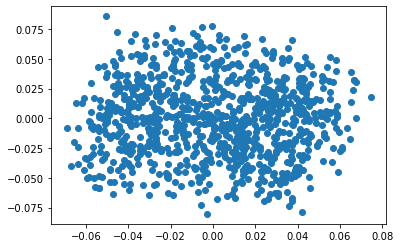

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=eigenvec[2], y=eigenvec[3])

In [7]:
# doing stuff with our VCA file to get the allele frequencies

In [8]:
vcf = open('/Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf', 'r')
AF_list = []
count = 0

for line in vcf:

    if line.startswith('#'):
        continue
    fields = line.strip('\r\n').split('\t')
    AF_temp = fields[7]
    AF_temp2= AF_temp[3:]
    AF_list.append(AF_temp2)
    
    
print(AF_list[0:20])
vcf.close()

['0.690206', '0.710472', '0.565776', '0.503932', '0.712679', '0.713408', '0.695903', '0.493498', '0.496109', '0.5215', '0.529564', '0.524582', '0.518839', '0.522523', '0.519038', '0.540366', '0.536523', '0.528079', '0.52593', '0.522124']


In [ ]:
# plotting allele frequencies

In [ ]:
AF_list2 = int(AF_list)
#AF_list2[:10]
#plt.hist(AF_list, bins = 30) 
#plt.show()

fig, ax = plt.subplots( nrows = 3)
fig.set_figheight(20)
fig.set_figwidth(10)
ax[2].hist((AF_list), bins = 30)
ax[2].set_title('Allele Frequency Distribution')
ax[2].set_ylabel('Counts')
ax[2].set_xlabel('Allele Frequncy')

hist((AF_list), bins = 30)

In [ ]:
# perform quantitative association testing for each phenotype

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recodeA flag deprecated.  Use "--recode A ...".
Logging to nochr.log.
Options in effect:
  --out nochr
  --recode A
  --vcf /Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: nochr-temporary.bed + nochr-temporary.bim + nochr-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to nochr.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%

In [20]:
%%bash
plink --vcf ~/qbb2020-answers/week3/hw-files/no_chr_final.vcf --pheno ~/qbb2020-answers/week3/zero.txt --linear --allow-no-sex --covar plink.eigenvec --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/week3/zero.txt
  --vcf /Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
0 phenotype values present after --pheno.


Error: --linear without --all-pheno requires a scalar phenotype.


In [ ]:
awk '{gsub(/^NA/,"0"); print}' ~/qbb2020-answers/week3/BYxRM_PhenoData.txt > zero.txt

In [19]:
%%bash
plink \
  --vcf ~/qbb2020-answers/week3/hw-files/no_chr_final.vcf \
  --pheno ~/qbb2020-answers/week3/zero.txt \
  --assoc \
  --allow-no-sex

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-no-sex
  --assoc
  --pheno /Users/cmdb/qbb2020-answers/week3/zero.txt
  --vcf /Users/cmdb/qbb2020-answers/week3/hw-files/no_chr_final.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
0 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%3